In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import urllib.request
import sklearn

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()
housing = pd.DataFrame(data = california_housing.data , columns = california_housing.feature_names )
housing['median_house_value'] = california_housing.target
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20640 non-null  float64
 1   HouseAge            20640 non-null  float64
 2   AveRooms            20640 non-null  float64
 3   AveBedrms           20640 non-null  float64
 4   Population          20640 non-null  float64
 5   AveOccup            20640 non-null  float64
 6   Latitude            20640 non-null  float64
 7   Longitude           20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

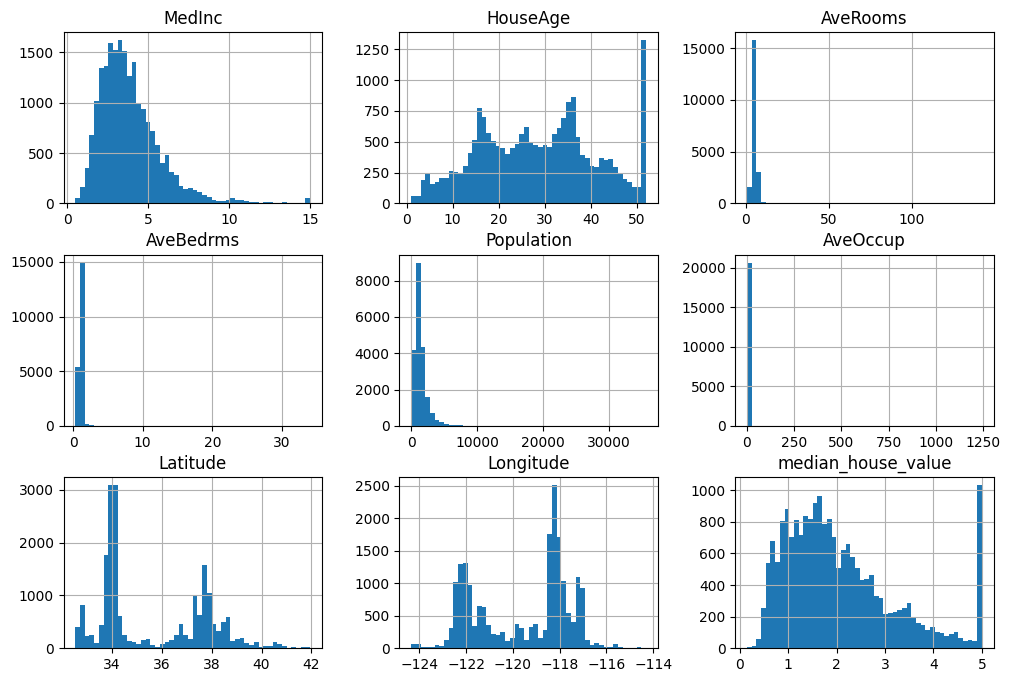

In [ ]:
housing.hist(bins=50, figsize =(12, 8))

In [ ]:
housing['income_cat'] = pd.cut( housing['MedInc'] ,
                               bins = [0 , 1.5 , 3. , 4.5 , 6 , np.inf],
                               labels = [1 , 2, 3 , 4 , 5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0 , grid = True)

In [ ]:
#splitter = sklearn.model_selection.StratifiedShuffleSplit(n_splits = 10 , test_size = 0.2 , random_state = 42)
#strat_splits = []
#for train_idx , test_idx in splitter.split(housing, housing['income_cat']):
 # strat_train_set_n = housing.iloc[train_idx]
 # strat_test_set_n = housing.iloc[test_idx]
 # strat_splits.append([strat_train_set_n , strat_test_set_n])
#strat_train_set , strat_test_set = strat_splits[0]

#we can do get one split in a shorter way using train_test_split(stratify = housing['income_cat])

In [ ]:
from sklearn.model_selection import train_test_split
strat_train_set , strat_test_set = sklearn.model_selection.train_test_split(housing , test_size = 0.2,
                                                                            stratify = housing['income_cat'],
                                                                            random_state = 42)

In [ ]:
for set_ in (strat_train_set, strat_test_set):
  set_.drop('income_cat', axis = 1 , inplace = True)

In [ ]:
housing_train = strat_train_set.copy()

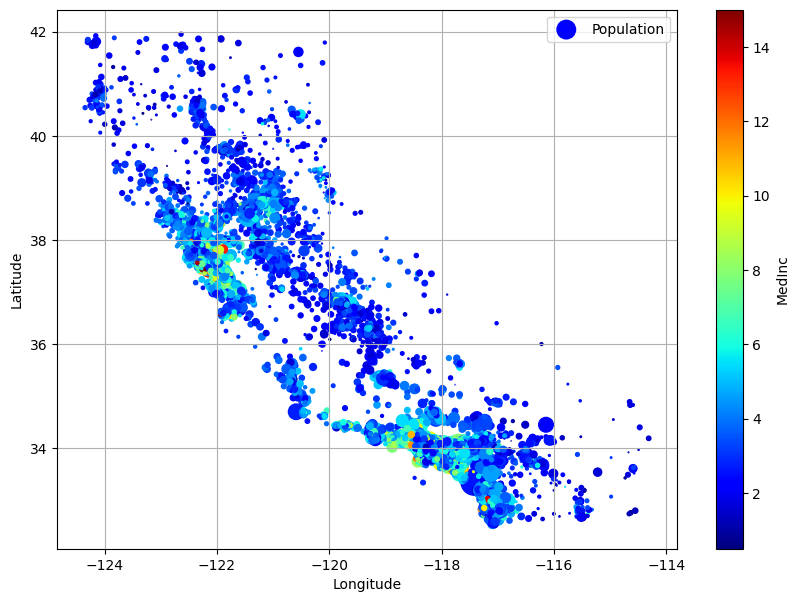

In [ ]:
housing_train.plot(kind = 'scatter' , x = 'Longitude', y ='Latitude' , grid = True,
                   s = housing_train['Population']/100 , label = 'Population' ,
                   c = 'MedInc' , cmap = 'jet' , colorbar = True ,
                   legend = True , sharex =False , figsize = (10, 7))
plt.show()